<a href="https://colab.research.google.com/github/Exanom/Shap_ConceptDirft_examples/blob/main/simple_CD_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Before running the code, upload DataStreamGenerator_modified.py to colab**

In [ ]:
from DataStreamGenerator_modified import DataStreamGenerator

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
C = DataStreamGenerator(class_count=2, attribute_count=2, sample_count=10000, noise=False, redunce_variable=False)

In [ ]:
DATASETS = [

    [C.Linear_Gradual_Rotation,'linear_gradual_rotation'],
    [C.Linear_Sudden_Rotation,'linear_sudden_rotation'],
    [C.Linear_Recurrent_Rotation,'linear_recurrent_rotation'],
    [C.Linear_Abrupt,'linear_abrupt'],
  ]
model = RandomForestClassifier()

In [ ]:
dataset = DATASETS[0]
X,Y = dataset[0](dataset[1],False,True)

/content/DataStreamGenerator_modified.py:201: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X, Y, s=area0, c="hotpink", edgecolors="g", label="class0", cmap='viridis', alpha=0.7)
/content/DataStreamGenerator_modified.py:202: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X, Y, s=area1, c="#88c999", edgecolors="blue", label="class1", cmap='viridis', alpha=0.7)


<Figure size 640x480 with 0 Axes>

In [ ]:
shaps = []
for i in range(10):
  start = (i*1000)
  end = 1000+start
  X_train, X_test, Y_train, Y_test = train_test_split(X[start:end],Y[start:end],test_size=0.3,
                                                	stratify =Y[start:end], random_state = 13)
  model.fit(X_train,Y_train)
  explainer = shap.TreeExplainer(model)
  explanation = explainer(X[start:end])
  #absolute of shap values
  avg = np.abs(explanation.values)
  #average for all samples
  avg = avg.mean(0)
  #average for all classes
  avg = avg.mean(1)
  shaps.append(avg)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

In [ ]:
print("format:")
print("feature0 feature1")
for s in shaps:
  print("=========")

  print(s)

format:
feature0 feature1
[0.1949123  0.32589429]
[0.08745725 0.42496631]
[0.01563509 0.4736094 ]
[0.08377916 0.41963173]
[0.19141614 0.32948169]
[0.31314136 0.21108857]
[0.42595919 0.08431033]
[0.4787668  0.01358128]
[0.42267965 0.09128486]
[0.33143064 0.18806574]


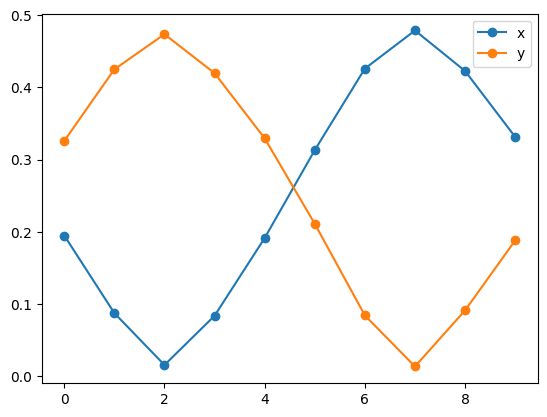

In [ ]:
df = pd.DataFrame(shaps)
df.columns = ['x', 'y']
for col in df.columns:
  plt.plot(range(len(df[col])),df[col], label=col, marker='o')
plt.legend()
plt.show()